In [ ]:
#This analysis focuses on uncovering meaningful relationships within the datasets provided
#(posts, votes, users, badges, and comments). It aims to extract actionable insights
#and highlight key patterns influencing user engagement

Badges Dataset:
    Id  UserId     Name                     Date  Class  TagBased
0  28      19  Teacher  2010-08-25T19:51:49.187      3     False
1  29      24  Teacher  2010-08-25T19:51:49.327      3     False
2  37      11  Teacher  2010-08-25T19:56:49.207      3     False
3  38      32  Teacher  2010-08-25T19:56:49.240      3     False
4  43      30  Teacher  2010-08-25T20:01:49.150      3     False 

Comments Dataset:
    Id  PostId  Score                                               Text  \
0   1       4      0  do you mean measure a frame of unknown dimensi...   
1   2       4      0  The specified height of a frame. I already bou...   
2   5      23      2  Be sure to bend and flex the casing of the tir...   
3   6       8      0  What kind of valve? I know, only very-very old...   
4   7      23      1  You can also run your hand along the inside of...   

              CreationDate  UserId UserDisplayName  
0  2010-08-25T19:43:35.443    21.0             NaN  
1  2010-08-25T1

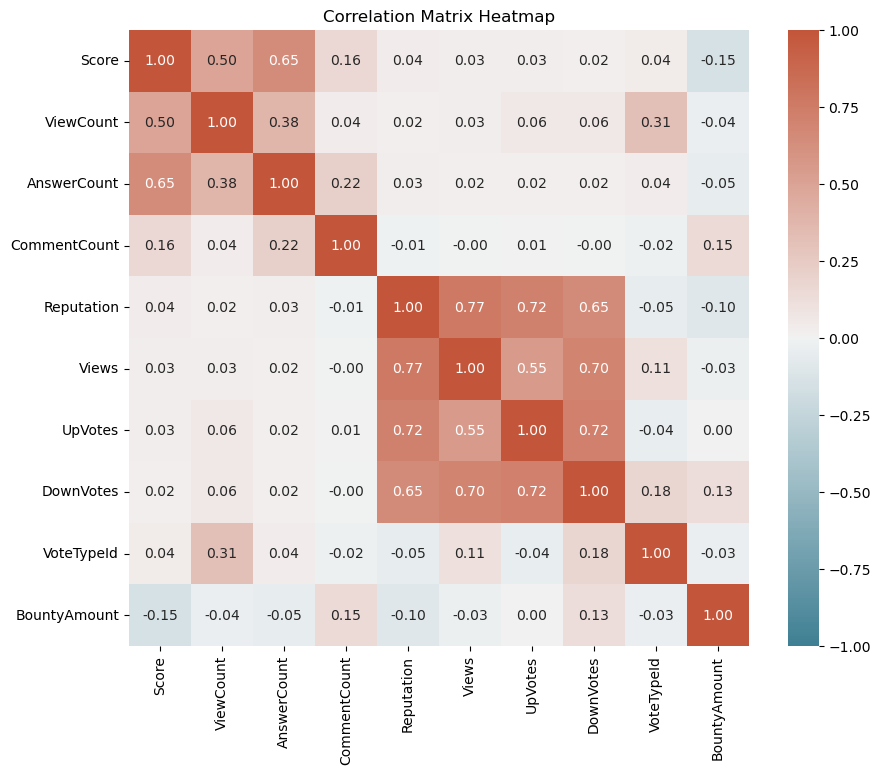

Strong Correlations: 
Score with AnswerCount (0.65) -> highly engaging posts receive better scores. 
Reputation with Views (0.77) -> reputable users generate significant visibility. 

Negative Correlations: 
Score and BountyAmount (-0.15) highlighting a very poor trend, 
when score increase the BountyAmount decrease -> means posts with bounties might not always achieve high scores. 
 


In [211]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
badges = pd.read_csv("Badges.csv")
comments = pd.read_csv("Comments.csv")
post_links = pd.read_csv("PostLinks.csv")
posts = pd.read_csv("Posts.csv")
users = pd.read_csv("Users.csv")
votes = pd.read_csv("Votes.csv")

# Inspect datasets
for df, name in zip([badges, comments, post_links, posts, users, votes], 
                    ["Badges", "Comments", "PostLinks", "Posts", "Users", "Votes"]):
    print(f"{name} Dataset:\n", df.head(), "\n")

# Check for null values and data types
for df, name in zip([badges, comments, post_links, posts, users, votes], 
                    ["Badges", "Comments", "PostLinks", "Posts", "Users", "Votes"]):
    print(f"Missing Values in {name}:\n", df.isnull().sum(), "\n")

# Prepare data subsets for correlation
posts_subset = posts[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']].dropna()
users_subset = users[['Reputation', 'Views', 'UpVotes', 'DownVotes']].dropna()
votes_subset = votes[['VoteTypeId', 'BountyAmount']].dropna()

# Merge datasets for correlation, Heatmap 
merged_data = pd.concat([posts_subset, users_subset, votes_subset], axis=1)
correlation_matrix = merged_data.corr()

# Display correlation matrix to see btw. which variables I have correlation and how strong is the relationship 
plt.figure(figsize=(10, 8))

#change the palette of Correlation Matrix for a better visualisation without missleading colour for low negative value like -0.15
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True), vmin=-1, vmax=1)


plt.title("Correlation Matrix Heatmap")
plt.show()

print("Strong Correlations: \nScore with AnswerCount (0.65) -> highly engaging posts receive better scores. \nReputation with Views (0.77) -> reputable users generate significant visibility. \n")

#Strong Correlations:
#Score with AnswerCount (0.65) -> highly engaging posts receive better scores.
#Reputation with Views (0.77) -> reputable users generate significant visibility.

print("Negative Correlations: \nScore and BountyAmount (-0.15) highlighting a very poor trend, \nwhen score increase the BountyAmount decrease -> means posts with bounties might not always achieve high scores. \n ")

#Negative Correlations:
#Score and BountyAmount (-0.15) highlighting a very poor trend, 
#when score increase the BountyAmount decrease -> means posts with bounties might not always achieve high scores.



In [56]:


# Prepare data subsets for visualizations
posts_subset = posts[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']].dropna()
users_subset = users[['Reputation', 'Views', 'UpVotes', 'DownVotes']].dropna()
votes_view_counts = votes.merge(posts[['Id', 'ViewCount']], left_on='PostId', right_on='Id')
vote_view_aggregates = votes_view_counts.groupby('VoteTypeId')['ViewCount'].mean().sort_values()




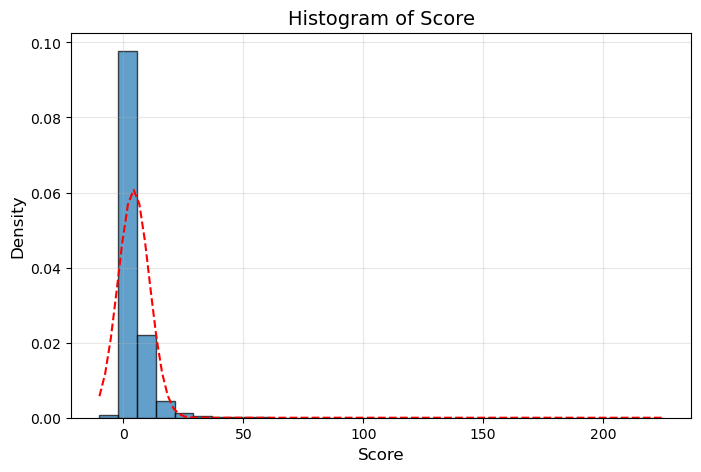

Exhibit right-skewed distributions, with outliers dominating the upper ranges. 
We can see a long tail on the right 
 


In [207]:
# 1. Histogram

def plot_histogram(data, column):
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=30, alpha=0.7, edgecolor='black', density=True)
    mu, sigma = data[column].mean(), data[column].std()
    x = np.linspace(data[column].min(), data[column].max(), 100)
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='red', linestyle='--')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Plot Histogram for Score
plot_histogram(posts_subset, 'Score')

print("Exhibit right-skewed distributions, with outliers dominating the upper ranges. \nWe can see a long tail on the right \n ")

# Exhibit right-skewed distributions, with outliers dominating the upper ranges. 
# We can see a long tail on the right


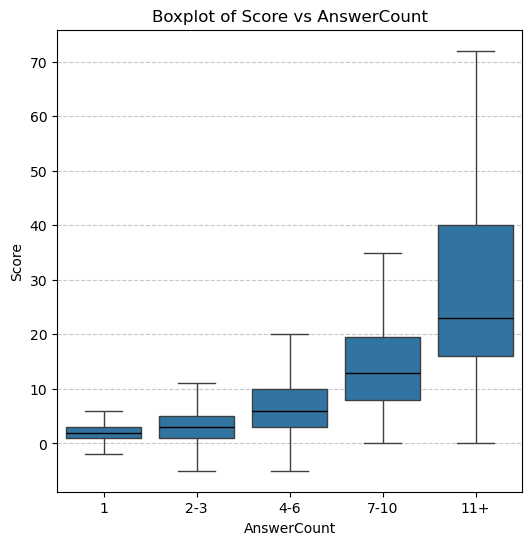

Posts with more answers generally achieve higher scores, but the variability in scores 
increases significantly for posts with 11+ answers. This suggests that highly engaging 
posts attract both high scores and occasional lower ones.


In [203]:

# Create a boxplot: Score vs. AnswerCount
plt.figure(figsize=(6, 6))
sns.boxplot(data=posts_subset, x='AnswerCount', y='Score', showfliers=False, 
            medianprops=dict(color="black"))
plt.title('Boxplot of Score vs AnswerCount')
plt.xlabel('AnswerCount')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Posts with more answers generally achieve higher scores, but the variability in scores \nincreases significantly for posts with 11+ answers. This suggests that highly engaging \nposts attract both high scores and occasional lower ones.")


#Posts with more answers generally achieve higher scores, but the variability in scores 
#increases significantly for posts with 11+ answers. This suggests that highly engaging 
#posts attract both high scores and occasional lower ones.


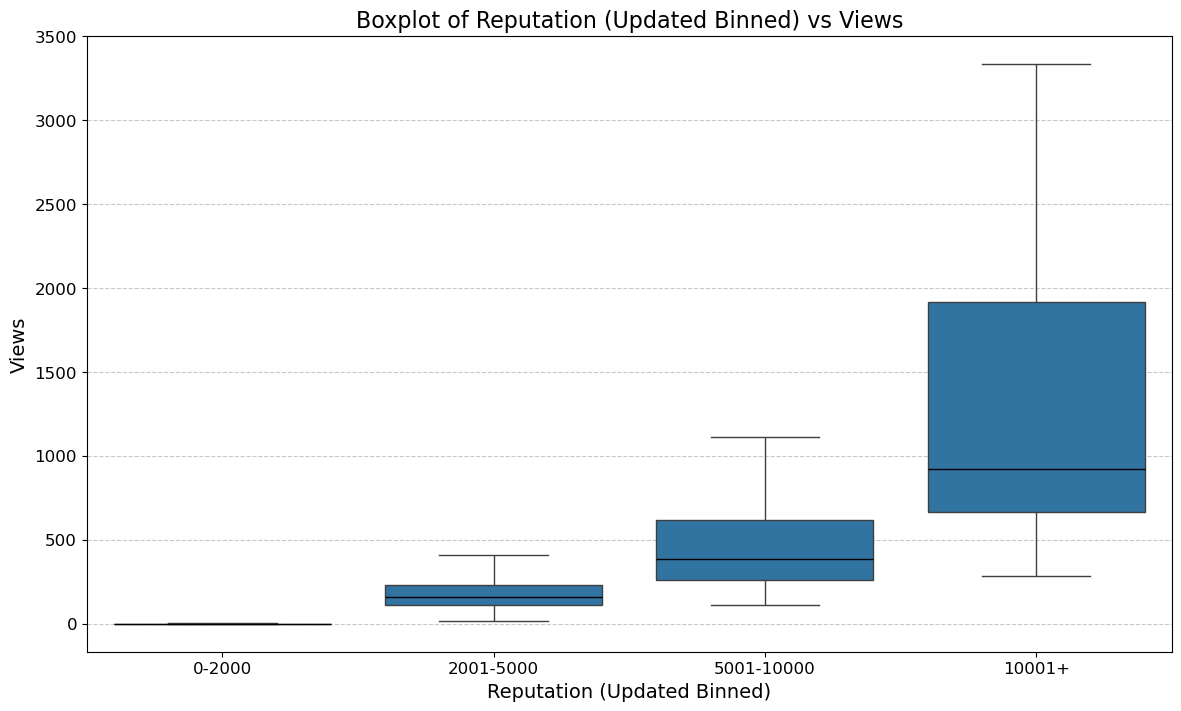

Users with higher view counts on their posts tend to have higher reputations, 
but there are notable overlaps in the distributions, especially among users 
with moderate views. This implies that reputation and visibility  
correlate but are not exclusive indicators of one another. 
 


In [189]:
# Changed bins for rappresent Reputation better
bins = [0, 2000, 5000, 10000, np.inf]
labels = ['0-2000', '2001-5000', '5001-10000', '10001+']
users['ReputationCategory'] = pd.cut(users['Reputation'], bins=bins, labels=labels)

# Create a boxplot: Reputation vs. Views (Updated Binned Reputation)
plt.figure(figsize=(14, 8))  # Increased figure size for better readability
sns.boxplot(data=users, x='ReputationCategory', y='Views', showfliers=False, 
            medianprops=dict(color="black"))
plt.title('Boxplot of Reputation (Updated Binned) vs Views', fontsize=16)
plt.xlabel('Reputation (Updated Binned)', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Users with higher view counts on their posts tend to have higher reputations, \nbut there are notable overlaps in the distributions, especially among users \nwith moderate views. This implies that reputation and visibility  \ncorrelate but are not exclusive indicators of one another. \n ")


#Users with higher view counts on their posts tend to have higher reputations, 
#but there are notable overlaps in the distributions, especially among users 
#with moderate views. This implies that reputation and visibility 
#correlate but are not exclusive indicators of one another.


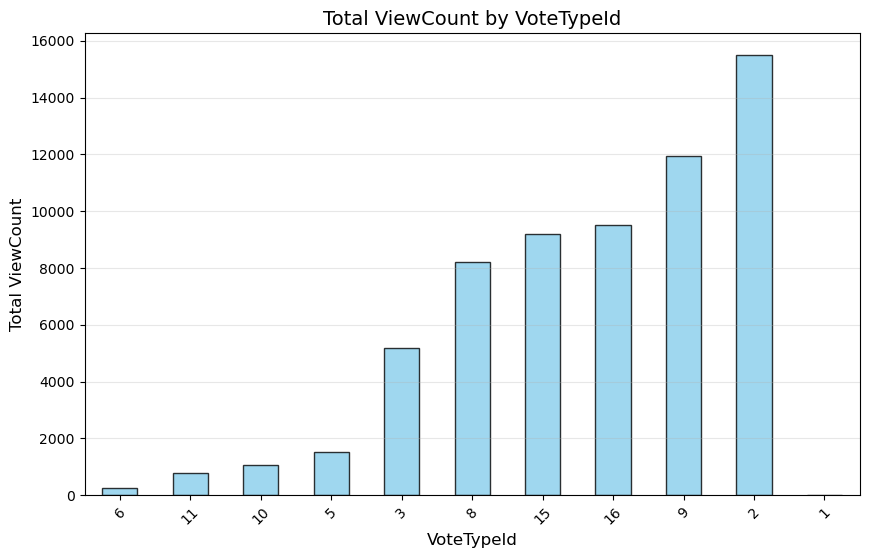

Initialy I plotted Average ViewCount by VoteTypeId but avarage wasn't the right choice  
it's better now, Total ViewCount by VoteTypeId 
Certain vote types are associated with higher view counts, 
indicating that the type of vote (ex., upvote, downvote, or favorite) 
reflects the engagement level of a post. 
This visualization suggests which types of content resonate more with 
users and may inform strategies to promote or curate popular content. 


In [187]:
#Bar chart
# Function to plot bar chart
def plot_bar_chart(grouped_data):
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
    plt.title('Total ViewCount by VoteTypeId', fontsize=14)
    plt.xlabel('VoteTypeId', fontsize=12)
    plt.ylabel('Total ViewCount', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# Plot Bar Chart for VoteTypeId vs ViewCount
plot_bar_chart(vote_view_aggregates)

# Frase con andare a capo
print("Initialy I plotted Average ViewCount by VoteTypeId but avarage wasn't the right choice  \nit's better now, Total ViewCount by VoteTypeId \nCertain vote types are associated with higher view counts, \nindicating that the type of vote (ex., upvote, downvote, or favorite) \nreflects the engagement level of a post. \nThis visualization suggests which types of content resonate more with \nusers and may inform strategies to promote or curate popular content. ")


#Initialy I plotted Average ViewCount by VoteTypeId but avarage wasn't the right choice 
#it's better now, Total ViewCount by VoteTypeId
#Certain vote types are associated with higher view counts,
#indicating that the type of vote (ex., upvote, downvote, or favorite)
#reflects the engagement level of a post.
#This visualization suggests which types of content resonate more with
#users and may inform strategies to promote or curate popular content.



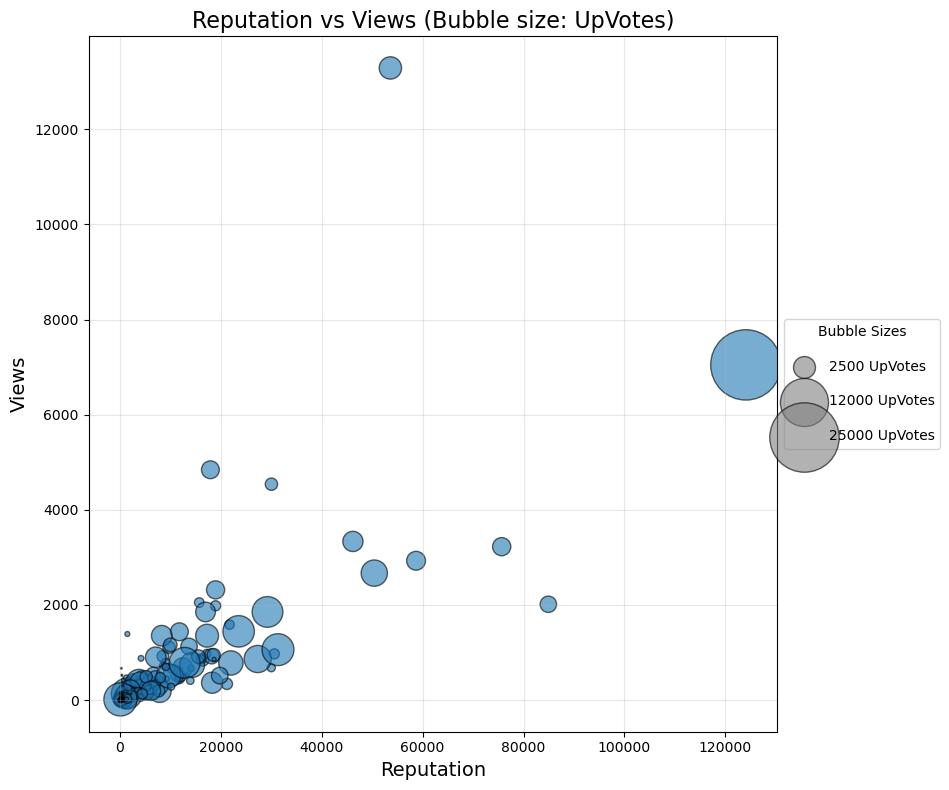

Users with higher reputations tend to have a wider range of views, 
with some outliers achieving significantly high visibility. 
Bubble sizes indicate that highly reputable users often receive more upvotes, 
aligning reputation with user engagement.


In [185]:
# 5. Bubble Chart with External Legend
def plot_bubble_chart(data, x_col, y_col, size_col):
    plt.figure(figsize=(12, 8))

    # Create scatter plot
    plt.scatter(
        data[x_col], data[y_col],
        s=data[size_col] / 10, alpha=0.6, edgecolor='black'
    )

    # Custom legend values
    legend_values = [2500, 12000, 25000]
    legend_sizes = [val / 10 for val in legend_values]
    
    for size, label in zip(legend_sizes, legend_values):
        plt.scatter([], [], s=size, alpha=0.6, color='gray', edgecolor='black', 
                    label=f'{label} {size_col}')
    
    # Adjust legend
    plt.legend(
        scatterpoints=1, frameon=True, labelspacing=1.5, loc='center left',
        bbox_to_anchor=(1, 0.5), title="Bubble Sizes", fontsize=10
    )

    # Add titles and labels
    plt.title(f'{x_col} vs {y_col} (Bubble size: {size_col})', fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust layout for space
    plt.show()

# Plot Bubble Chart for Reputation, Views, and UpVotes
plot_bubble_chart(users_subset, 'Reputation', 'Views', 'UpVotes')
print("Users with higher reputations tend to have a wider range of views, \nwith some outliers achieving significantly high visibility. \nBubble sizes indicate that highly reputable users often receive more upvotes, \naligning reputation with user engagement.")

#Users with higher reputations tend to have a wider range of views, 
#with some outliers achieving significantly high visibility.
#Bubble sizes indicate that highly reputable users often receive more upvotes,
#aligning reputation with user engagement.


In [1]:
#TASK 2

/var/folders/qj/8t_0v39n5nzgc_dj_5wkpt_40000gn/T/ipykernel_46626/888173199.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  posts_monthly = posts.resample('M', on='CreationDate').size()


Query asked to ChatGPT: 

Can you plot me a time series chart showing yearly the number of posts, using Python? 
Please take in consideration that I need the chart to perform decision making and show it to the board of directors, 
make it in a suitable way for a presentation, clear, readable and useful.  




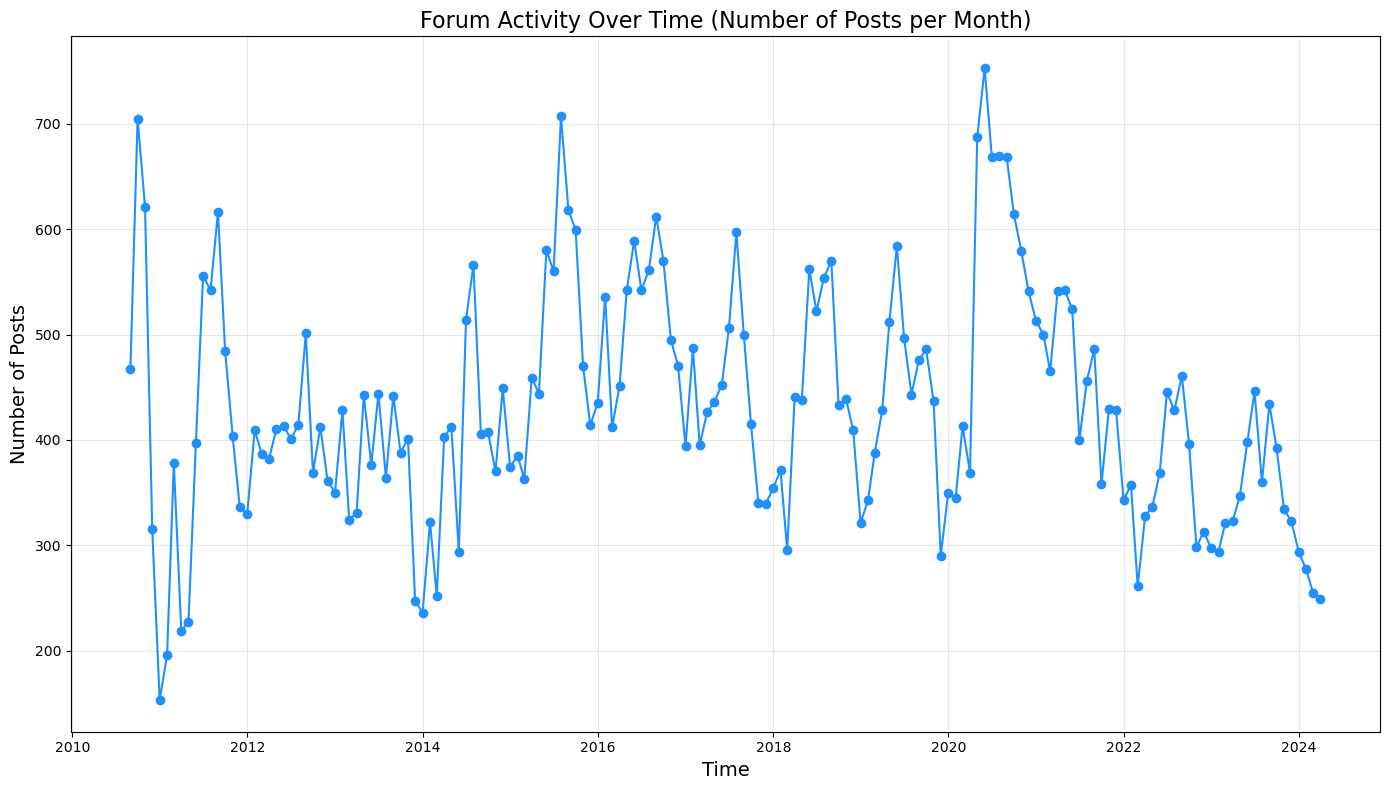

In this case line chart is a natural choice for time series data, making trends and changes easy to spot 
The overall assessment is positive but there are some things to adjust. 
The dataset spans several years, for this reason the chart has became crowded. 
Morover is pretty hard to understand the month a poin rappresnts, this makes almost impossible finding seasonalities.  
To fix it I suggest to explain how the scale on x-axis is written, add other informations like mean and 
highlight different periods with different colours. 


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets

posts = pd.read_csv("Posts.csv")
users = pd.read_csv("Users.csv")



# Ensure date parsing
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

# Group posts by month to analyze trends
posts_monthly = posts.resample('M', on='CreationDate').size()

# Plot the time series
plt.figure(figsize=(14, 8))
plt.plot(posts_monthly.index, posts_monthly.values, marker='o', linestyle='-', color='dodgerblue')
plt.title("Forum Activity Over Time (Number of Posts per Month)", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()


print("Query asked to ChatGPT: \n\nCan you plot me a time series chart showing yearly the number of posts, using Python? \nPlease take in consideration that I need the chart to perform decision making and show it to the board of directors, \nmake it in a suitable way for a presentation, clear, readable and useful.  \n\n")



plt.show()

print("In this case line chart is a natural choice for time series data, making trends and changes easy to spot \nThe overall assessment is positive but there are some things to adjust. \nThe dataset spans several years, for this reason the chart has became crowded. \nMorover is pretty hard to understand the month a poin rappresnts, this makes almost impossible finding seasonalities.  ")
print("To fix it I suggest to explain how the scale on x-axis is written, add other informations like mean and \nhighlight different periods with different colours. ")


Query asked to ChatGPT: 

Can you create a bubble chart showing the relationship between user reputation and the average score of their posts, using Python? 
Please take in consideration that I need the chart to perform decision making and show it to the board of directors, 
make it in a suitable way for a presentation, clear, readable and useful.  




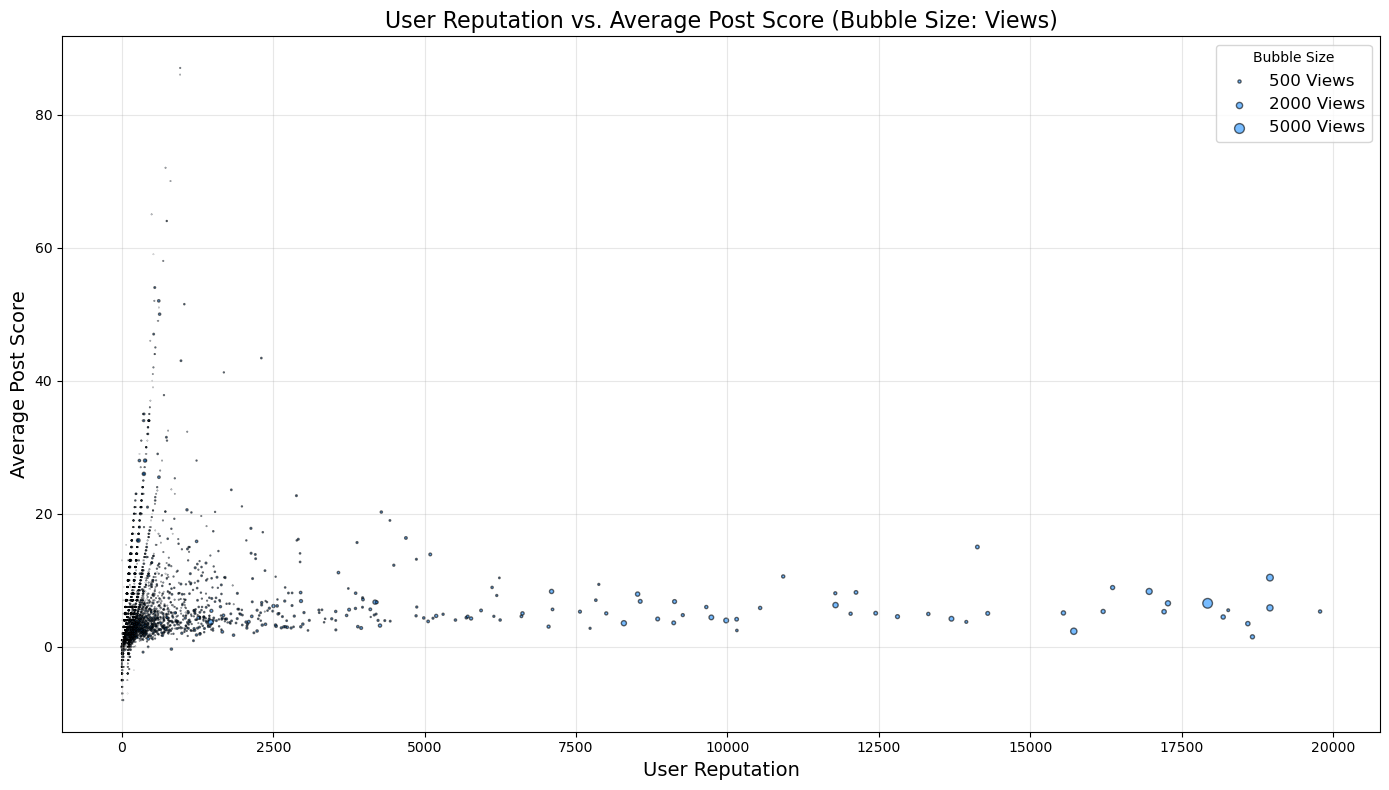

The intent here was to create a Multi-Dimensional chart that combines three metrics—Reputation: Average Post Score, and Views—making, making it rich in information. 
Large bubbles draw attention to highly viewed users, while the distribution shows trends between reputation and post score. 
The aim of the graph in a decision making activity is to help identify high-performing that 
peraphs can be the group with the highest value power. 
Identifying users with high reputation but low post scores allow me to make targeted action to enhance the community-power. 
Despite that the result is not so suitable for our purposes. 
Clearly we have an overload of information, combining three variables in a single plot overwhelm viewers. 
The meaning of bubble size is not immediately obvious as there's not legend. 

The clustering activity is not so useful as it's presented here. Users with similar reputations and scores sometimes overlap, 
making individual data points indistinct. 
Last outliers in 

In [61]:


import pandas as pd
import matplotlib.pyplot as plt

# Load datasets

posts = pd.read_csv("Posts.csv")
users = pd.read_csv("Users.csv")


# Ensure correct date parsing if needed (not required for this chart)
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

# Calculate average score per user
average_score_per_user = posts.groupby('OwnerUserId')['Score'].mean().reset_index()
average_score_per_user.columns = ['UserId', 'AverageScore']

# Merge with users dataset to include reputation
user_data = users.merge(average_score_per_user, left_on='Id', right_on='UserId')

# Filter data to remove outliers (optional, for cleaner visualization)
filtered_data = user_data[user_data['Reputation'] < 20000]  # Example threshold for Reputation

# Bubble chart
plt.figure(figsize=(14, 8))
bubble_sizes = filtered_data['Views'] / 100  # Adjust bubble size by Views
plt.scatter(filtered_data['Reputation'], filtered_data['AverageScore'], 
            s=bubble_sizes, alpha=0.6, edgecolor='black', color='dodgerblue')

# Add labels and title
plt.title("User Reputation vs. Average Post Score (Bubble Size: Views)", fontsize=16)
plt.xlabel("User Reputation", fontsize=14)
plt.ylabel("Average Post Score", fontsize=14)
plt.grid(alpha=0.3)

# Add legend for bubble sizes
legend_sizes = [500, 2000, 5000]
for size in legend_sizes:
    plt.scatter([], [], s=size / 100, color='dodgerblue', alpha=0.6, edgecolor='black',
                label=f"{size} Views")
plt.legend(title="Bubble Size", loc='upper right', fontsize=12)

plt.tight_layout()

print("Query asked to ChatGPT: \n\nCan you create a bubble chart showing the relationship between user reputation and the average score of their posts, using Python? \nPlease take in consideration that I need the chart to perform decision making and show it to the board of directors, \nmake it in a suitable way for a presentation, clear, readable and useful.  \n\n")


plt.show()

print("The intent here was to create a Multi-Dimensional chart that combines three metrics—Reputation: Average Post Score, and Views—making, making it rich in information. \nLarge bubbles draw attention to highly viewed users, while the distribution shows trends between reputation and post score. \nThe aim of the graph in a decision making activity is to help identify high-performing that \nperaphs can be the group with the highest value power. \nIdentifying users with high reputation but low post scores allow me to make targeted action to enhance the community-power. ")
print("Despite that the result is not so suitable for our purposes. \nClearly we have an overload of information, combining three variables in a single plot overwhelm viewers. \nThe meaning of bubble size is not immediately obvious as there's not legend. \n")
print("The clustering activity is not so useful as it's presented here. Users with similar reputations and scores sometimes overlap, \nmaking individual data points indistinct. \nLast outliers in Reputation or Views could dominate the chart, masking trends in the majority of users. \n ")
print("In terms of actionable decision developed from graph analysis, we can say the chart lacks clear segmentation or thresholds \nthat aid decision-making. \nThe answer: Which users should we prioritize; is still without answer\n ")
print("To make the chart more actionable and suitable for decision-making: \nSimplify Dimensions: Focus just on two primary metrics for clarity (ex. Scatter plot of Reputation vs Average Post Score) \nUse color to segment users into groups, and add a legend to recognise specific user groups or clusters. \n")
print("Filter out extreme outliers to make the chart more balanced. \nWe can add visual thresholds or reference lines to indicate desirable or undesirable ranges")